# Clustering Assignment
## Airlines Data
Perform clustering (hierarchical, K-means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.\
Draw the inferences from the clusters obtained.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
rawdata = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data', index_col='ID#')

### Data Description

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

- ID: Unique ID
- Balance: Number of miles eligible for award travel
- Qual_miles: Number of miles counted as qualifying for Topflight status
- cc1_miles: Number of miles earned with freq. flyer credit card in the past 12 months:
- cc2_miles: Number of miles earned with Rewards credit card in the past 12 months:
- cc3_miles: Number of miles earned with Small Business credit card in the past 12 months:
    - 1 = under 5,000
    - 2 = 5,000 - 10,000
    - 3 = 10,001 - 25,000
    - 4 = 25,001 - 50,000
    - 5 = over 50,000
- Bonus_miles: Number of miles earned from non-flight bonus transactions in the past 12 months
- Bonus_trans: Number of non-flight bonus transactions in the past 12 months
- Flight_miles_12mo: Number of flight miles in the past 12 months
- Flight_trans_12: Number of flight transactions in the past 12 months
- Days_since_enrolled: Number of days since enrolled in flier program
- Award: whether that person had award flight (free flight) or not

In [3]:
rawdata.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Data Visualization

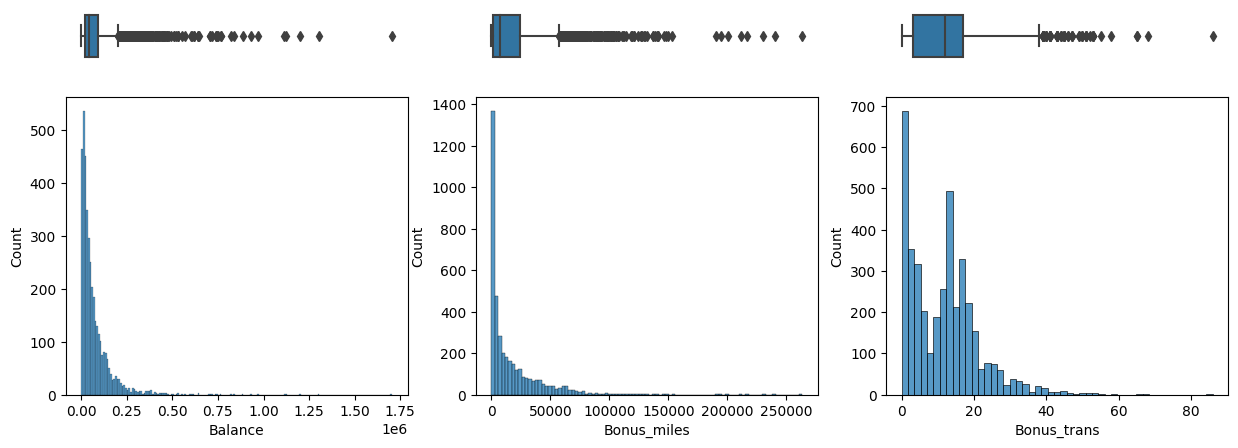

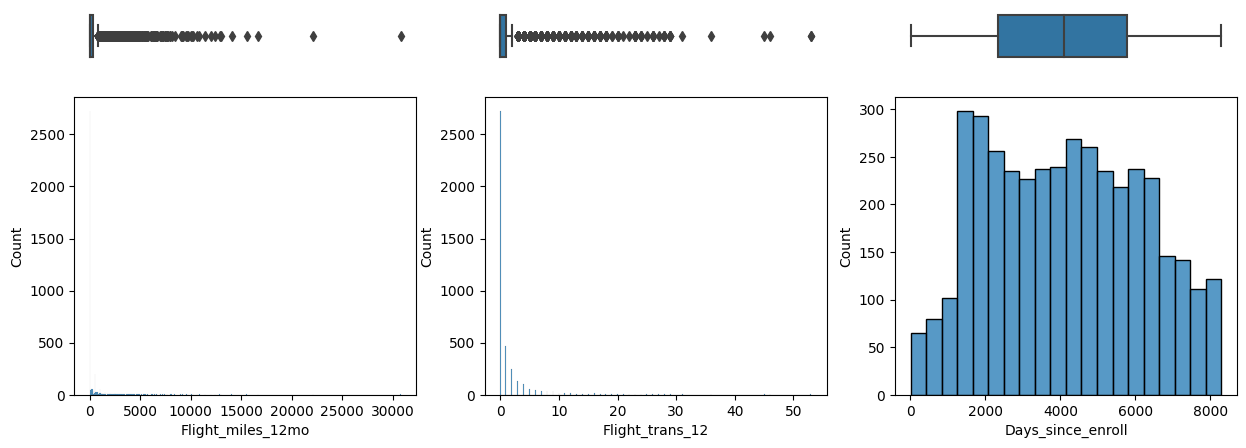

In [4]:
vars1 = ['Balance','Bonus_miles','Bonus_trans']
vars2 = ['Flight_miles_12mo','Flight_trans_12','Days_since_enroll']

def plotboxhist(vars):
    figs, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=len(vars), figsize=(5*len(vars),5), gridspec_kw={'height_ratios':(0.15,0.85)})
    for i in range(len(vars)):
        sns.boxplot(data=rawdata, x=vars[i], ax=ax_box[i])
        sns.histplot(data=rawdata, x=vars[i], ax=ax_hist[i])
        sns.despine(ax=ax_box[i], left=True, bottom=True)
        ax_box[i].set_xticks([])
        ax_box[i].set_yticks([])
        ax_box[i].set_xlabel('')
    plt.show()

plotboxhist(vars1)
plotboxhist(vars2)

<Axes: xlabel='Award?', ylabel='count'>

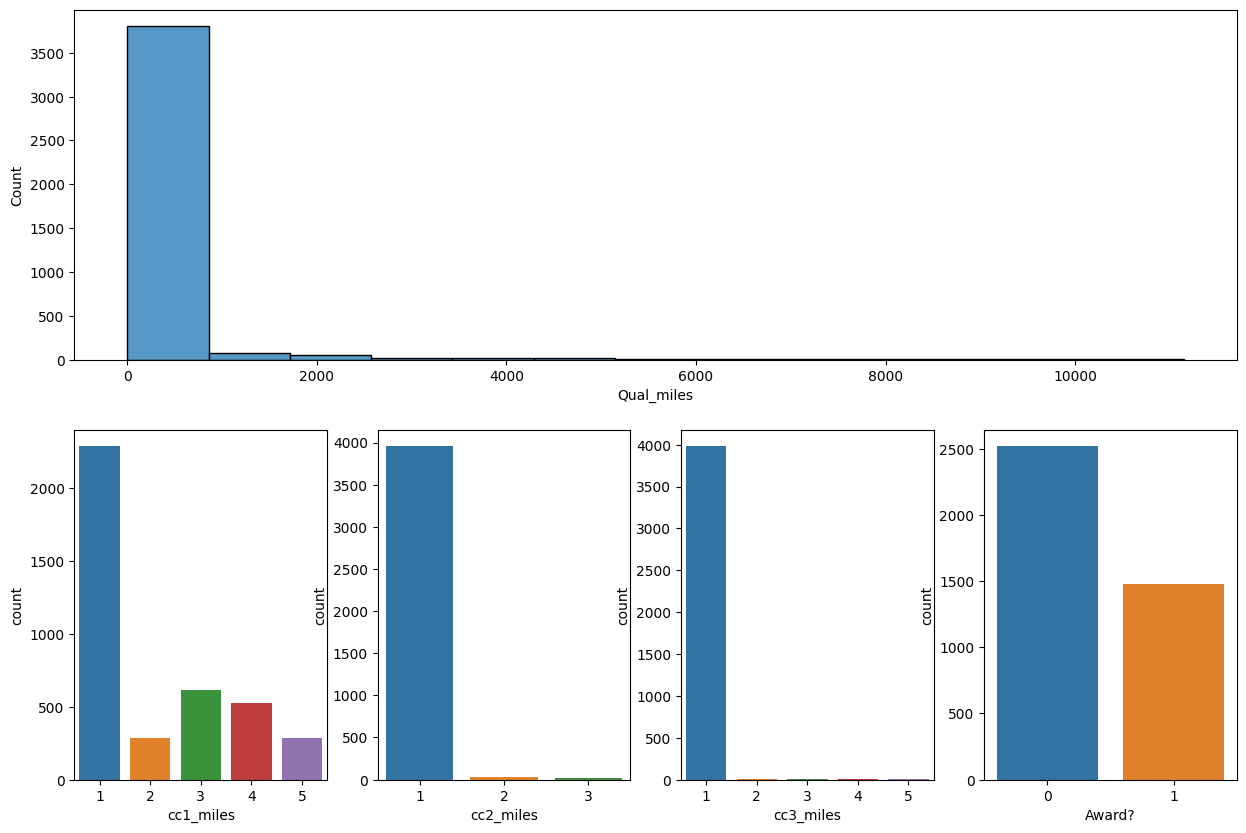

In [5]:
vars3 = ['Qual_miles','cc1_miles','cc2_miles','cc3_miles','Award?']
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(data=rawdata, x='Qual_miles')
plt.subplot(2,4,5)
sns.countplot(data=rawdata, x='cc1_miles')
plt.subplot(2,4,6)
sns.countplot(data=rawdata, x='cc2_miles')
plt.subplot(2,4,7)
sns.countplot(data=rawdata, x='cc3_miles')
plt.subplot(2,4,8)
sns.countplot(data=rawdata, x='Award?')

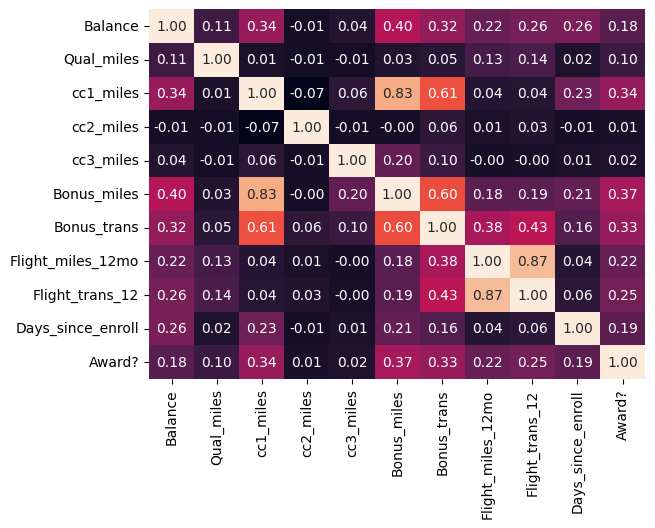

In [6]:
sns.heatmap(data=rawdata.corr(), annot=True, fmt='.2f',cbar=False);

### Normalizing the data
For clustering data should be on same scale.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(rawdata), columns=rawdata.columns)

In [8]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [9]:
# custom minmax function
def norm_function(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

# data reserved for plotting
plotdata = norm_function(rawdata)

### Visualizing clusters

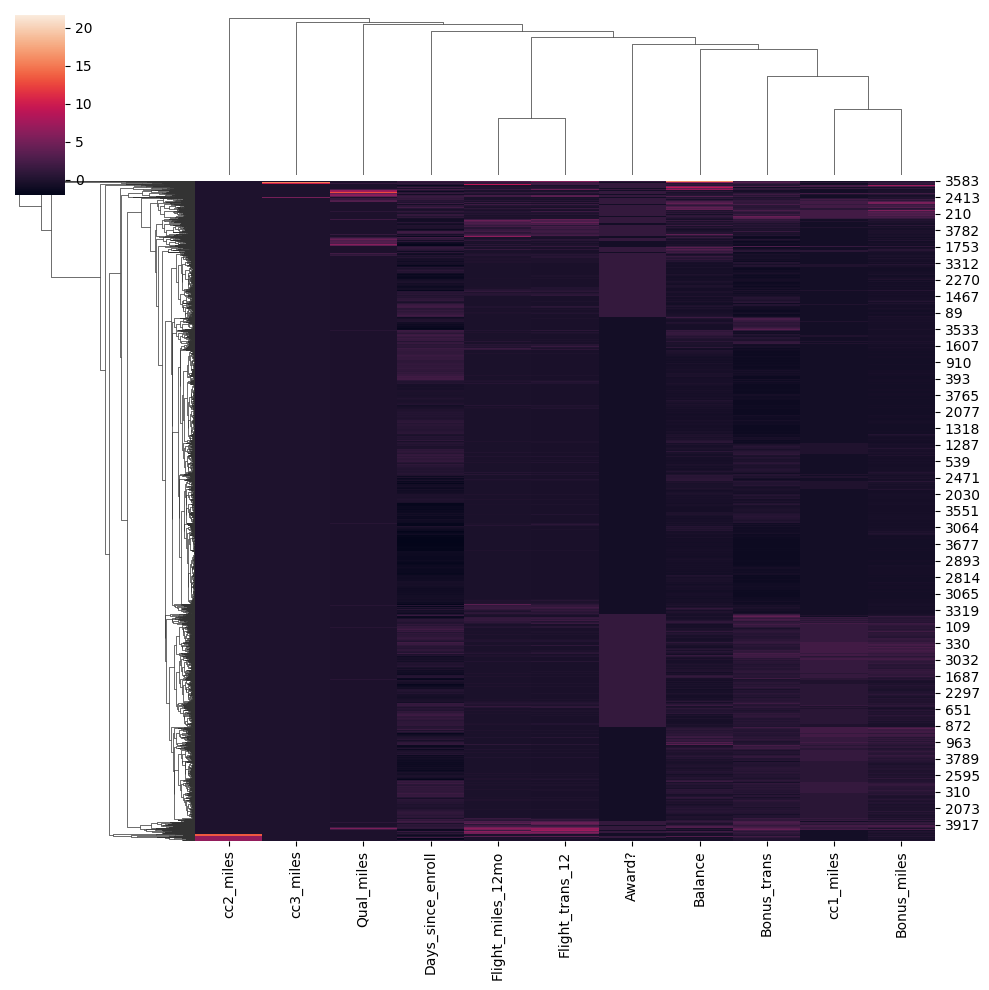

In [10]:
sns.clustermap(data=data);

To visualize cluster we will use tsne dimension reduction technique.\
So instead of using 11 variables, we extract all the imformation in two variables which are easier to plot

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,random_state=5)
array = tsne.fit_transform(data)
df = pd.DataFrame(array,columns=['x','y'])

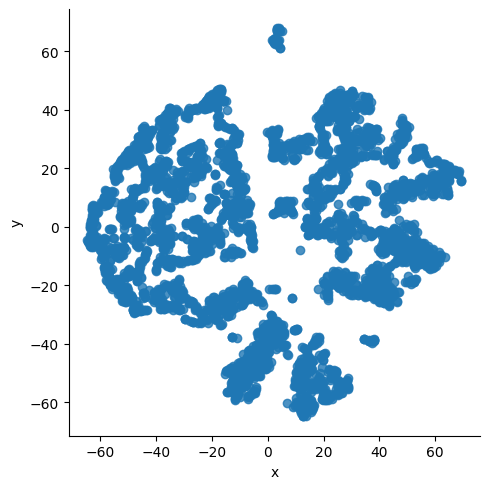

In [12]:
sns.lmplot(x='x',y='y',data=df,fit_reg=False);

### Hierarchical clustering

The algorithm of Agglomerative clustering starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied.
The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
- *ward* minimizes the variance of the clusters being merged.
- *average* uses the average of the distances of each observation of the two sets.
- *complete* linkage uses the maximum distances between all observations of the two sets.
- *single* uses the minimum of the distances between all observations of the two sets.

#### Dendrograms
<b>Dendrogram</b> is a tool to visualize hierarchical clustering that can handle multidimensional datasets.
The dendrogram shows data points on the bottom. Then, a tree is plotted with these points (representing single-point clusters) as the leaves, and a new node parent is added for each two clusters that are joined.
The <b>y-axis</b> in the dendrogram specify when in the agglomerative algorithm two clusters get merged. The <b>length</b> of each branch shows how far apart the merged clusters are.

Text(0.5, 1.0, 'Dendrogram (truncated) - Ward Linkage')

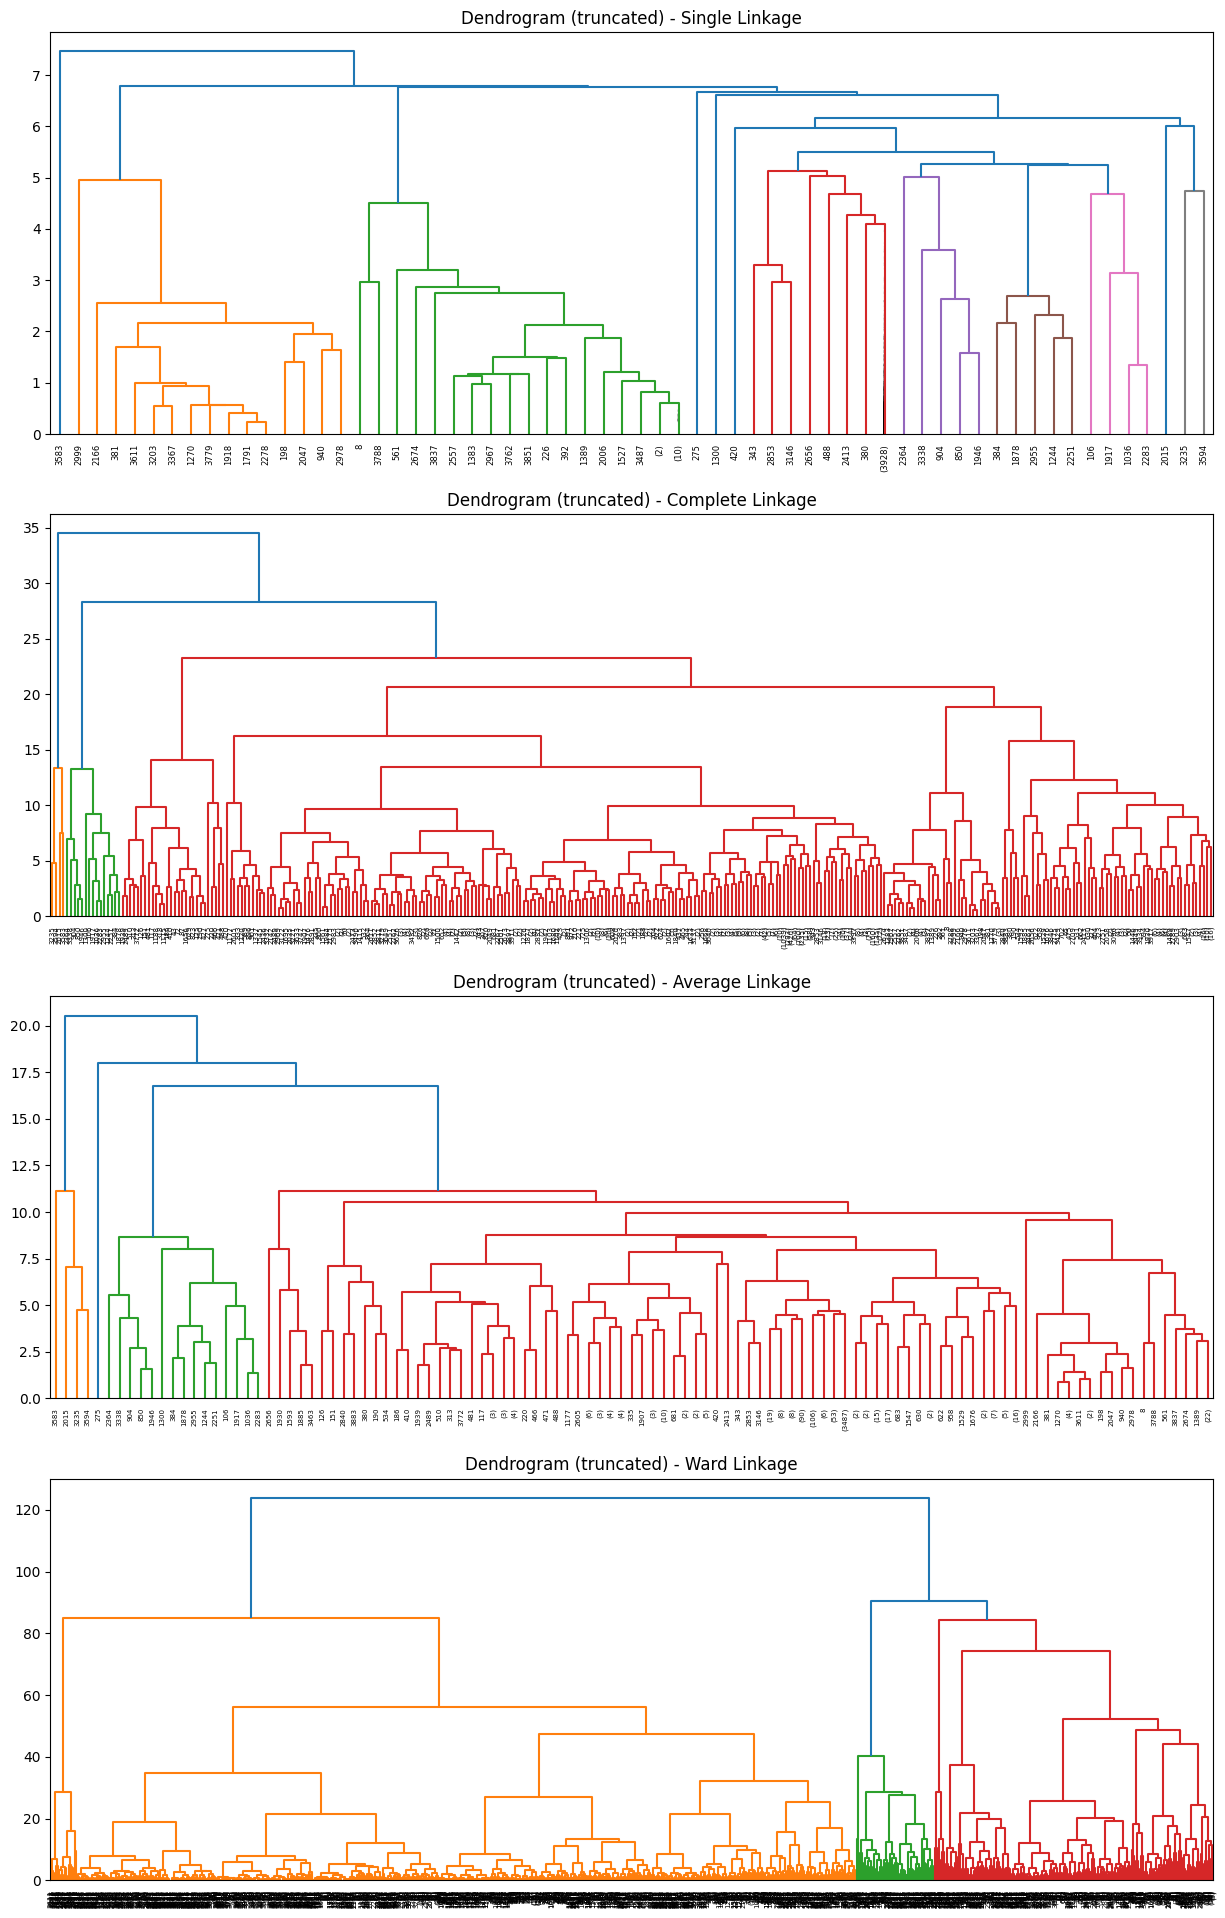

In [13]:
Z_single = sch.linkage(data, method='single')
Z_complete = sch.linkage(data, method='complete')
Z_average = sch.linkage(data, method='average')
Z_ward = sch.linkage(data, method='ward')

plt.figure(figsize=(15,24))
plt.subplot(4,1,1)
dendrogram = sch.dendrogram(Z_single,p=12,truncate_mode='level',show_contracted=True)
plt.title('Dendrogram (truncated) - Single Linkage')
plt.subplot(4,1,2)
dendrogram = sch.dendrogram(Z_complete,p=12,truncate_mode='level',show_contracted=True)
plt.title('Dendrogram (truncated) - Complete Linkage')
plt.subplot(4,1,3)
dendrogram = sch.dendrogram(Z_average,p=12,truncate_mode='level',show_contracted=True)
plt.title('Dendrogram (truncated) - Average Linkage')
plt.subplot(4,1,4)
dendrogram = sch.dendrogram(Z_ward,p=12,truncate_mode='level',show_contracted=True)
plt.title('Dendrogram (truncated) - Ward Linkage')

#plt.xlabel('Data point index')
#plt.ylabel('Distance')

#### Silhouette Method
The silhouette method is a technique used to determine the optimal number of clusters in agglomerative clustering. It involves computing the silhouette score for each data point, which is a measure of how similar a point is to its own cluster compared to other clusters. The optimal number of clusters is the one that maximizes the average silhouette score.

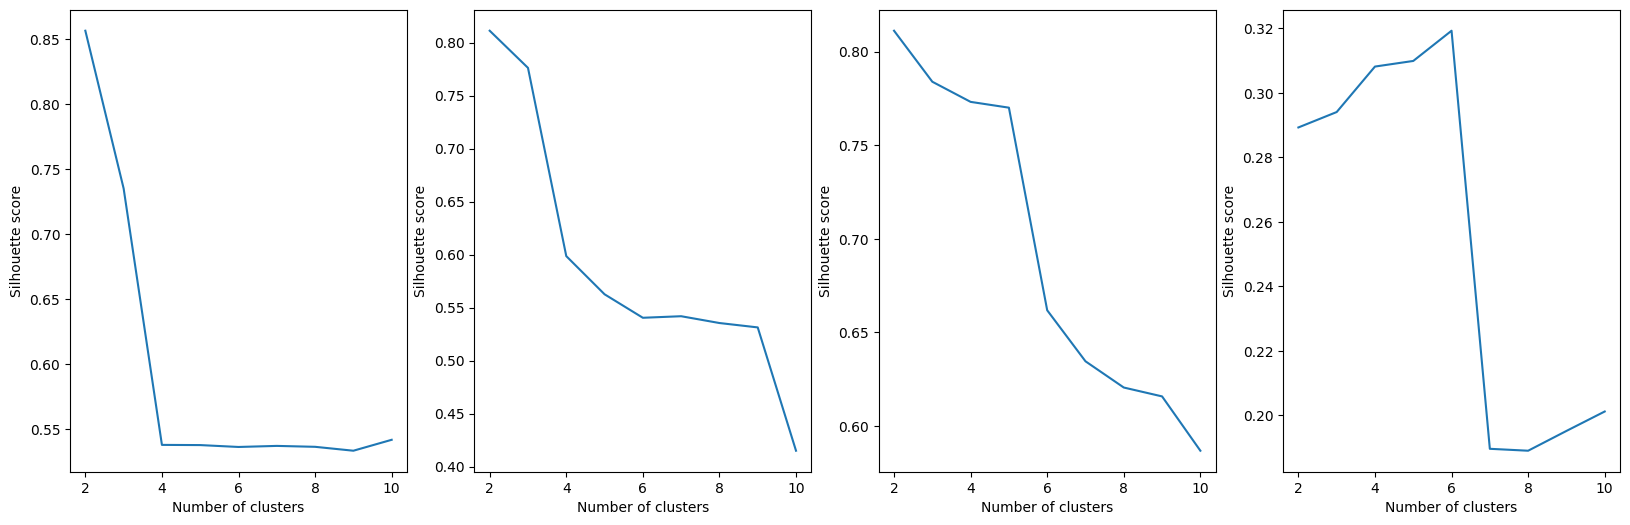

In [14]:
link = ['single','complete','average','ward']
plt.figure(figsize=(20,6))
for j in range(len(link)):
    sil_scores = []
    for i in range(2, 11):
        model = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage=link[j])
        cluster_labels = model.fit_predict(data)
        sil_score = silhouette_score(data, cluster_labels)
        sil_scores.append(sil_score)
    plt.subplot(1,4,j+1)
    plt.plot(range(2, 11), sil_scores)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')

In [15]:
hc_single = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='single')
y_hc_single = hc_single.fit_predict(data)
df['hc_single'] = y_hc_single

hc_complete = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
y_hc_complete = hc_complete.fit_predict(data)
df['hc_complete'] = y_hc_complete

hc_average = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')
y_hc_average = hc_average.fit_predict(data)
df['hc_average'] = y_hc_average

hc_ward = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
y_hc_ward = hc_ward.fit_predict(data)
df['hc_ward'] = y_hc_ward

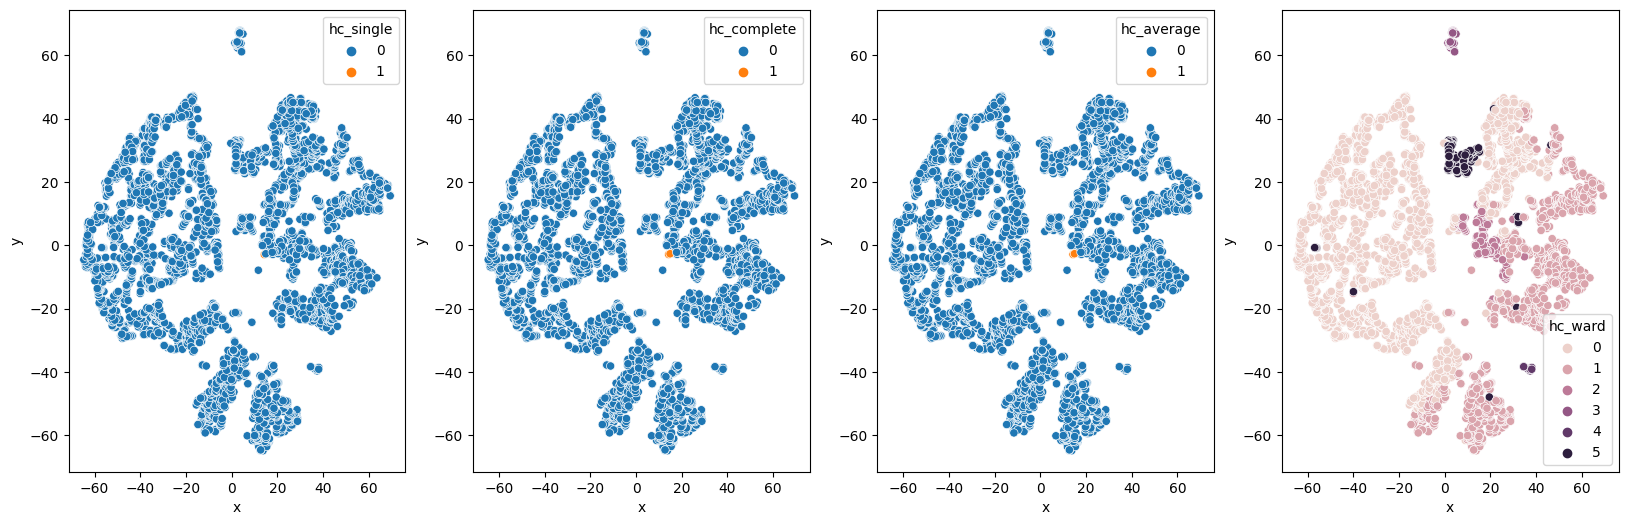

In [16]:
hcs = ['hc_single','hc_complete','hc_average','hc_ward']
figs, axes = plt.subplots(nrows=1,ncols=4,figsize=(20,6))
for i in range(len(hcs)):
    plotdata['cluster'] = df[hcs[i]]
    sns.scatterplot(data=df, x='x',y='y',hue=hcs[i],ax=axes[i])

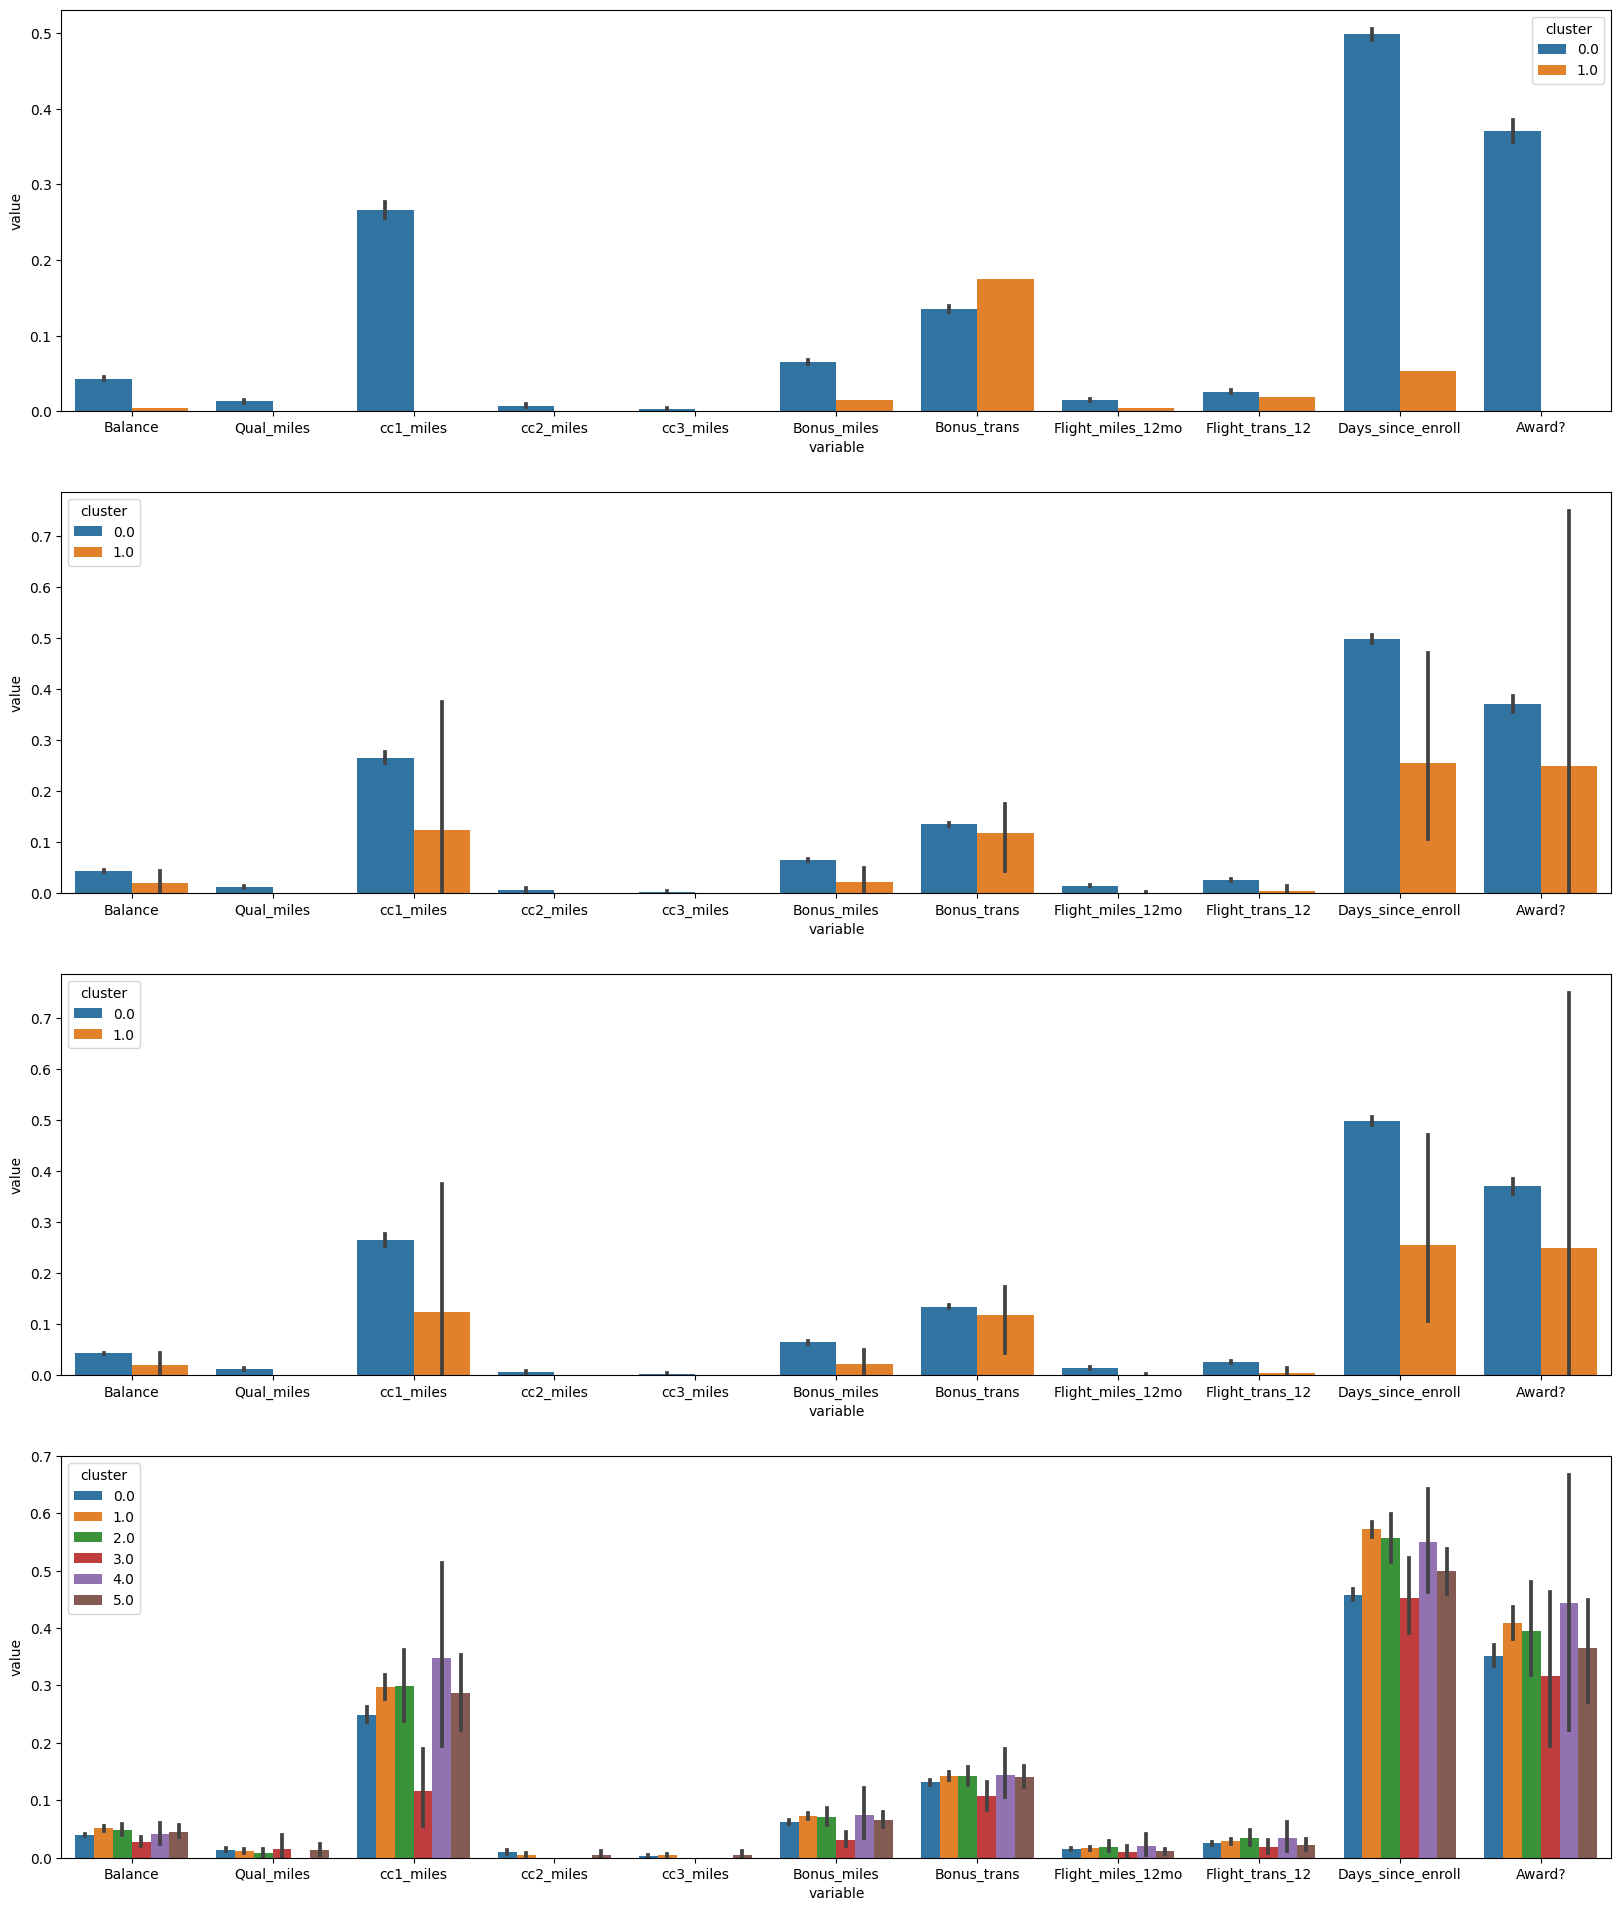

In [17]:
hcs = ['hc_single','hc_complete','hc_average','hc_ward']
figs, axes = plt.subplots(nrows=4,ncols=1,figsize=(20,24))
for i in range(len(hcs)):
    plotdata['cluster'] = df[hcs[i]]
    sns.barplot(data=plotdata.melt(id_vars=['cluster']), x='variable',y='value',hue='cluster',ax=axes[i])

##### Observations
As from scatterplots, hierarchical clustering couldnt seem to well cluster our data. And it is known that hierarchical clustering doesnt perform well in complex data structures.

- Still Aggloromerative clustering with average and complete linkage are similar and given us 2 well defined groups with one getting most rewards and other one less in comparison.
- ward linkage clustering has divided data into 6 groups. Each group has similar average amount of rewards. Still cluster 3 can be seen as least in getting all rewards.

### KMeans clustering

KMeans clustering algorithm starts with assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it.
The algorithm is finished when the assignment of instances to clusters no longer changes.

#### Elbow method
Used to find optimal value of k. It involves plotting the within-cluster sum of squares (WSS) against the number of clusters used in the k-means algorithm. The "elbow" in the plot is identified as the point of inflection where the WSS starts to decrease at a slower rate. This elbow point corresponds to the optimal number of clusters.

Text(0, 0.5, 'WCSS')

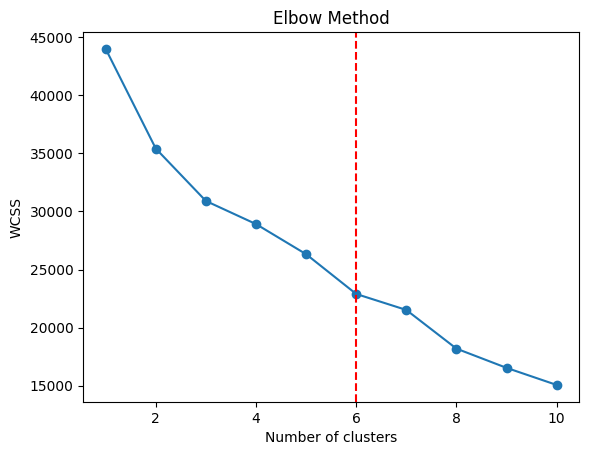

In [18]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0, n_init='auto')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker='o')
plt.axvline(x=6,color='r',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [19]:
kmeans = KMeans(n_clusters=6, n_init='auto', init='k-means++', random_state=0)
y_kmean = kmeans.fit_predict(data)

In [20]:
df['kmeans'] = y_kmean
plotdata['cluster'] = y_kmean

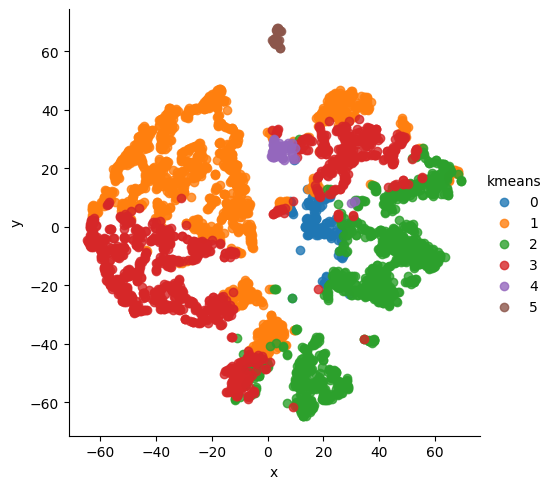

In [21]:
sns.lmplot(data=df, x='x',y='y',hue='kmeans',fit_reg=False)

<Axes: xlabel='variable', ylabel='value'>

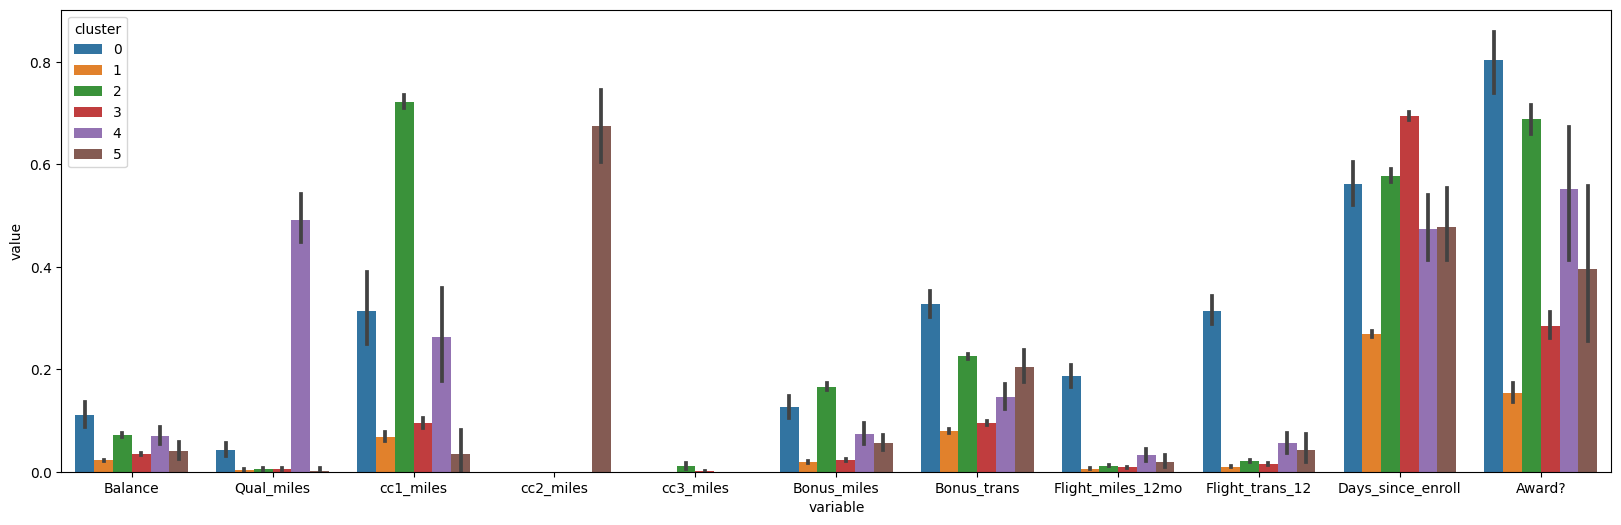

In [22]:
plt.figure(figsize=(20,6))
sns.barplot(data=plotdata.melt(id_vars=['cluster']), x='variable',y='value',hue='cluster')

##### Observations
We use KMeans to separate our data in 6 different groups.
- cluster 0: This group of customers able to receive award even without not getting cc2_miles and cc3_miles. They have most balance and bonus_travel. Also they are the ones travelled most in past 12 months.
- cluster 1: This group of customers has received lowest awards. These have least travel history with airlines.
- cluster 2: This group has most miles earned with freq. flyer credit card. They are also second in getting award.
- cluster 3: These people are oldest with enrolling in flier program. But they havent engaged that much with airlines.
- cluster 4: These people have most miles counted as qualifying for Topflight status. Somewhat average in getting rewards.
- cluster 5: Almost only people who has miles earned with Rewards credit card. Average in getting rewards.

### DBScan clustering

In DBSCAN method, we dont need to define number of cluster. Instead, we need to set hyperparameters *eps* and *min_samples*. To determine optimal value of these parameters we will use some techniques given below.

- **eps: This parameter controls the radius of the neighborhood around each point.**\
    To find optimal value of eps we will plot elbow plot of distance between each point and k nearest neighbor. We will use kneighbors function from sklearn to determine distance to k nearest neighbor to each point.
- **min_samples: This parameter determines the minimum number of points required to form a dense region.**\
    To estimate optimal value of min_samples we will use silhoutte score, which measures how similar each point is to its own cluster compared to other clusters.

Text(0.5, 1.0, 'Elbow curve for estimating eps')

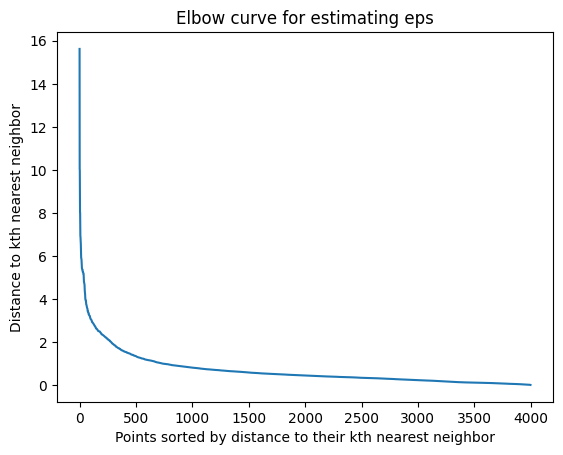

In [23]:
from sklearn.neighbors import kneighbors_graph

k = 5
distances = kneighbors_graph(data, k, mode='distance').toarray()
k_distances = distances.max(axis=1)

plt.plot(sorted(k_distances, reverse=True))
plt.xlabel('Points sorted by distance to their kth nearest neighbor')
plt.ylabel('Distance to kth nearest neighbor')
plt.title('Elbow curve for estimating eps')

Text(0.5, 1.0, 'Silhouette score for estimating min_samples')

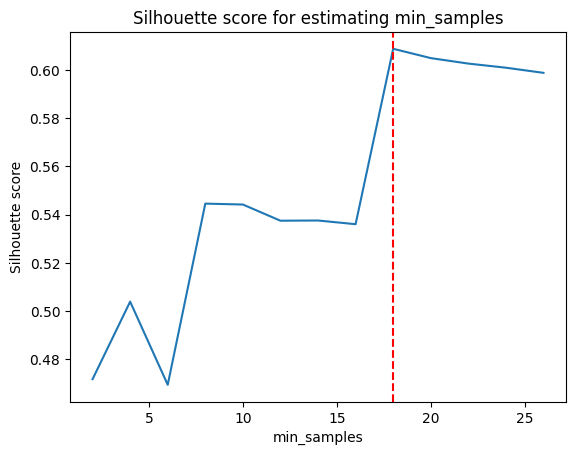

In [24]:
scores = []
array = [2,4,6,8,10,12,14,16,18,20,22,24,26]
for min_samples in array:
    dbscan = DBSCAN(eps=2.2, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    score = silhouette_score(data, labels)
    scores.append(score)

plt.plot(array, scores)
plt.axvline(x=18,color='r',linestyle='--')
plt.xlabel('min_samples')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for estimating min_samples')

From our analysis above we found optimal values,\
*eps=1.3* and *min_samples=7*

In [25]:
dbscan = DBSCAN(eps=2.2, min_samples=18)
dbscan.fit(data)

DBSCAN(eps=2.2, min_samples=18)

In [26]:
df['dbscan'] = dbscan.labels_
plotdata['cluster'] = dbscan.labels_

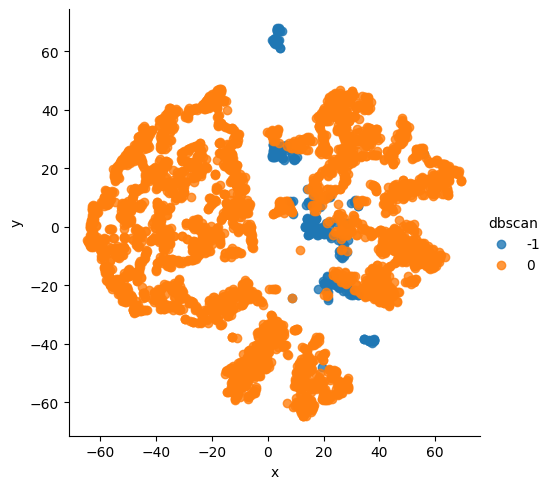

In [27]:
sns.lmplot(data=df, x='x',y='y',hue='dbscan',fit_reg=False);

<Axes: xlabel='variable', ylabel='value'>

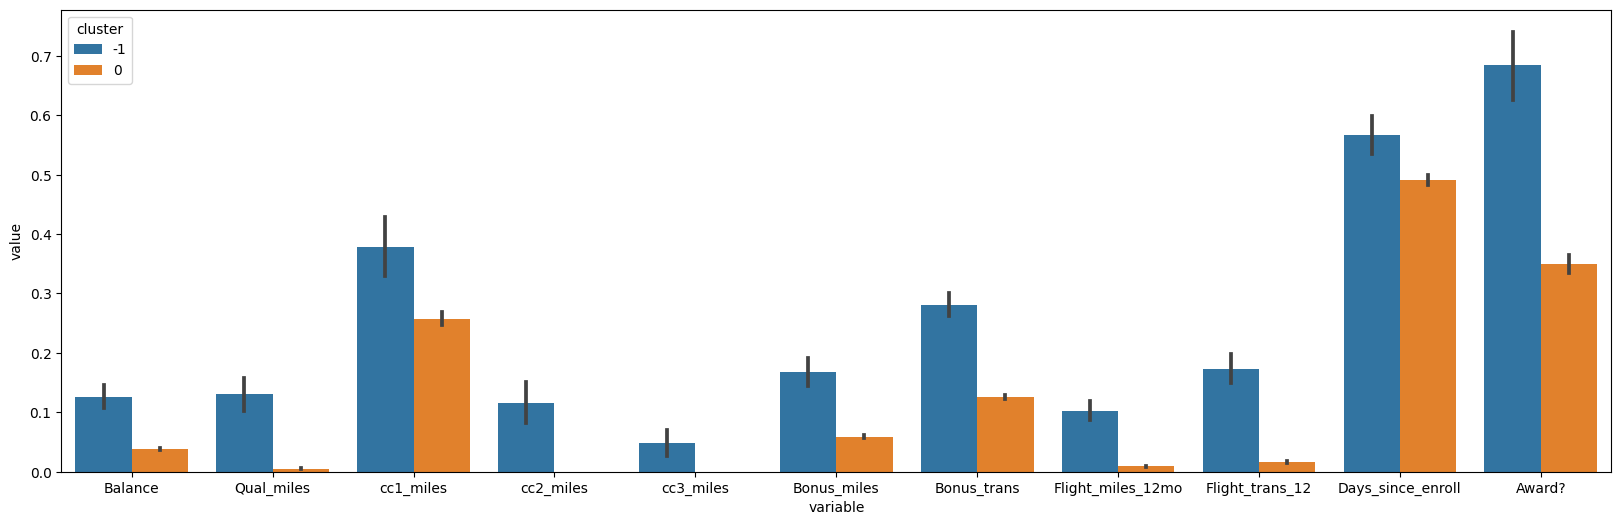

In [28]:
plt.figure(figsize=(20,6))
sns.barplot(data=plotdata.melt(id_vars=['cluster']), x='variable',y='value',hue='cluster')

##### Observations
DBScan has created 2 clusters from our data.
- We can see cluster -1 is higher in every variable. This are people with highest travel with airlines and most probably got bonus rewards.
- Whereas cluster 0 are the customers who hasnt got bonus miles with credit card and small business card. This group of people got less rewards than other group.